<a href="https://colab.research.google.com/github/poclab-web/gaussian_output_analysis/blob/main/gaussian16%E3%83%95%E3%82%A1%E3%82%A4%E3%83%AB%E3%81%AE%E8%AA%AD%E3%81%BF%E8%BE%BC%E3%81%BF%E3%81%A8%E5%87%BA%E5%8A%9B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%bash
wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
bash Miniconda3-py37_4.12.0-Linux-x86_64.sh -b -f -p /usr/local 
conda install python=3.7 --yes

PREFIX=/usr/local
Unpacking payload ...
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py37h27cfd23_1003
    - ca-certificates==2022.3.29=h06a4308_1
    - certifi==2021.10.8=py37h06a4308_2
    - cffi==1.15.0=py37hd667e15_1
    - charset-normalizer==2.0.4=pyhd3eb1b0_0
    - colorama==0.4.4=pyhd3eb1b0_0
    - conda-content-trust==0.1.1=pyhd3eb1b0_0
    - conda-package-handling==1.8.1=py37h7f8727e_0
    - conda==4.12.0=py37h06a4308_0
    - cryptography==36.0.0=py37h9ce1e76_0
    - idna==3.3=pyhd3eb1b0_0
    - ld_impl_linux-64==2.35.1=h7274673_9
    - libffi==3.3=he6710b0_2
    - libgcc-ng==9.3.0=h5101ec6_17
    - libgomp==9.3.0=h5101ec6_17
    - libstdcxx-ng==9.3.0=hd4cf53a_17
    - ncurses==6.3=h7f8727e_2
    - openssl==1.1.1n=h7f8727e_0
    - pip==21.2.2=py37h06a4308_0
    - pycosat==0.6.3=py37h27cfd23_0
    - pycparser==2.21=pyhd3

--2022-11-04 00:34:34--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104996770 (100M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 4.50M 22s
    50K .......... .......... .......... .......... ..........  0% 4.50M 22s
   100K .......... .......... .......... .......... ..........  0% 10.7M 18s
   150K .......... .......... .......... .......... ..........  0% 14.0M 15s
   200K .......... .......... .......... .......... ..........  0% 10.8M 14s
   250K .......... .......... .......... .......... ..........  0% 13.0M 13s
   300K .......... .......... .......... .......... ..........  0% 15.3M 12s
   350K .......... .........

In [8]:
import sys
_ = (sys.path.append("/usr/local/lib/python3.7/site-packages"))

In [5]:
!conda install -c conda-forge openbabel -y

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

# All requested packages already installed.

Retrieving notices: ...working... done


In [9]:
import openbabel
from openbabel import pybel
# import pybel
# 昔のバージョンだと、import pybelで読み込んでいましたが、バージョンが新しくなって変わりました。環境によって変えてください。

In [10]:
pybel.informats
# 'g16': 'Gaussian Output', を読み込むことにする。

{'abinit': 'ABINIT Output Format',
 'acesout': 'ACES output format',
 'acr': 'ACR format',
 'adfband': 'ADF Band output format',
 'adfdftb': 'ADF DFTB output format',
 'adfout': 'ADF output format',
 'alc': 'Alchemy format',
 'aoforce': 'Turbomole AOFORCE output format',
 'arc': 'Accelrys/MSI Biosym/Insight II CAR format',
 'axsf': 'XCrySDen Structure Format',
 'bgf': 'MSI BGF format',
 'box': 'Dock 3.5 Box format',
 'bs': 'Ball and Stick format',
 'c09out': 'Crystal 09 output format',
 'c3d1': 'Chem3D Cartesian 1 format',
 'c3d2': 'Chem3D Cartesian 2 format',
 'caccrt': 'Cacao Cartesian format',
 'can': 'Canonical SMILES format',
 'car': 'Accelrys/MSI Biosym/Insight II CAR format',
 'castep': 'CASTEP format',
 'ccc': 'CCC format',
 'cdjson': 'ChemDoodle JSON',
 'cdx': 'ChemDraw binary format',
 'cdxml': 'ChemDraw CDXML format',
 'cif': 'Crystallographic Information File',
 'ck': 'ChemKin format',
 'cml': 'Chemical Markup Language',
 'cmlr': 'CML Reaction format',
 'cof': 'Culgi object

以下の情報を取得する

 Zero-point correction=                           0.318110 (Hartree/Particle)

 Thermal correction to Energy=                    0.333386

 Thermal correction to Enthalpy=                  0.334331

 Thermal correction to Gibbs Free Energy=         0.273188

 Sum of electronic and zero-point Energies=           -713.858038

 Sum of electronic and thermal Energies=              -713.842762

 Sum of electronic and thermal Enthalpies=            -713.841818

 Sum of electronic and thermal Free Energies=         -713.902960

In [104]:
file_path = "/content/6a_6_311+G_d_p.log"

In [105]:
import os 
name = os.path.splitext(os.path.basename(file_path))[0]
name

'6a_6_311+G_d_p'

In [106]:
with open(file_path) as f:
  s = f.read()
  m = pybel.readstring('g16', s)

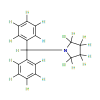

In [107]:
m

In [71]:
with open(file_path) as f:
    lines = f.readlines()
    Zero_point_correction = [line for line in lines if 'Zero-point correction' in line]
    Thermal_correction_to_Energy = [line for line in lines if 'Thermal correction to Energy' in line]
    Thermal_correction_to_Enthalpy = [line for line in lines if 'Thermal correction to Enthalpy' in line]
    Thermal_correction_to_Gibbs_Free_Energy = [line for line in lines if 'Thermal correction to Gibbs Free Energy' in line]
    Sum_of_electronic_and_zero_point_Energies = [line for line in lines if 'Sum of electronic and zero-point Energies' in line]
    Sum_of_electronic_and_thermal_Energies = [line for line in lines if 'Sum of electronic and thermal Energies' in line]
    Sum_of_electronic_and_thermal_Enthalpies = [line for line in lines if 'Sum of electronic and thermal Enthalpies' in line]
    Sum_of_electronic_and_thermal_Free_Energies = [line for line in lines if 'Sum of electronic and thermal Free Energies' in line]

In [61]:
Zero_point_correction

['Zero-point correction=                           0.318110 (Hartree/Particle)']

In [49]:
Thermal_correction_to_Energy

['Thermal correction to Energy=                    0.333386']

In [52]:
Thermal_correction_to_Enthalpy

['Thermal correction to Enthalpy=                  0.334331']

In [53]:
Thermal_correction_to_Gibbs_Free_Energy

['Thermal correction to Gibbs Free Energy=         0.273188']

In [54]:
Sum_of_electronic_and_zero_point_Energies

['Sum of electronic and zero-point Energies=           -713.858038']

In [55]:
Sum_of_electronic_and_thermal_Energies

['Sum of electronic and thermal Energies=              -713.842762']

In [56]:
Sum_of_electronic_and_thermal_Enthalpies

['Sum of electronic and thermal Enthalpies=            -713.841818']

In [57]:
Sum_of_electronic_and_thermal_Free_Energies

['Sum of electronic and thermal Free Energies=         -713.902960']

In [88]:
m_xyz = m.write("xyz")
m_xyz = '\n'.join(m_xyz.splitlines()[2:])
print(m_xyz)

C         -3.05200       -2.06255       -0.89762
C         -1.93128       -1.29628       -1.21758
C         -1.25389       -0.57000       -0.23552
C         -1.72836       -0.61947        1.07988
C         -2.84936       -1.37978        1.40215
C         -3.51466       -2.10750        0.41503
H         -3.56426       -2.61865       -1.67510
H         -1.58165       -1.26205       -2.24459
H         -1.22252       -0.04719        1.84826
H         -3.20600       -1.40412        2.42621
H         -4.38715       -2.69967        0.66735
C         -0.00004        0.22550       -0.60323
H         -0.00015        0.33077       -1.70484
C          1.25427       -0.56936       -0.23569
C          1.93102       -1.29649       -1.21756
C          1.72980       -0.61743        1.07939
C          3.05210       -2.06228       -0.89772
H          1.58058       -1.26334       -2.24434
C          2.85116       -1.37726        1.40152
H          1.22449       -0.04442        1.84756
C          3.51579  

# まとめて表示

In [95]:
output = name + '\n' \
+ '\n' \
+ m_xyz + '\n' \
+ '\n' \
+ Zero_point_correction[0] \
+ Thermal_correction_to_Energy[0] \
+ Thermal_correction_to_Enthalpy[0] \
+ Thermal_correction_to_Gibbs_Free_Energy[0] \
+ Sum_of_electronic_and_zero_point_Energies[0] \
+ Sum_of_electronic_and_thermal_Energies[0] \
+ Sum_of_electronic_and_thermal_Enthalpies[0] \
+ Sum_of_electronic_and_thermal_Free_Energies[0] \

In [96]:
print(output)

6a_6_311+G_d_p

C         -3.05200       -2.06255       -0.89762
C         -1.93128       -1.29628       -1.21758
C         -1.25389       -0.57000       -0.23552
C         -1.72836       -0.61947        1.07988
C         -2.84936       -1.37978        1.40215
C         -3.51466       -2.10750        0.41503
H         -3.56426       -2.61865       -1.67510
H         -1.58165       -1.26205       -2.24459
H         -1.22252       -0.04719        1.84826
H         -3.20600       -1.40412        2.42621
H         -4.38715       -2.69967        0.66735
C         -0.00004        0.22550       -0.60323
H         -0.00015        0.33077       -1.70484
C          1.25427       -0.56936       -0.23569
C          1.93102       -1.29649       -1.21756
C          1.72980       -0.61743        1.07939
C          3.05210       -2.06228       -0.89772
H          1.58058       -1.26334       -2.24434
C          2.85116       -1.37726        1.40152
H          1.22449       -0.04442        1.84756
C   

In [100]:
# 書き込み
with open("output.txt", mode='w') as f:
    f.write(output)

# まとめて実行のテスト

In [133]:
file_path = "/content/6a_6_311+G_d_p.log"

In [134]:
# ファイルの読み込み部分
import os 
name = os.path.splitext(os.path.basename(file_path))[0]
with open(file_path) as f:
    s = f.read()
    m = pybel.readstring('g16', s)
with open(file_path) as f:
    lines = f.readlines()
    Zero_point_correction = [line for line in lines if 'Zero-point correction' in line]
    Thermal_correction_to_Energy = [line for line in lines if 'Thermal correction to Energy' in line]
    Thermal_correction_to_Enthalpy = [line for line in lines if 'Thermal correction to Enthalpy' in line]
    Thermal_correction_to_Gibbs_Free_Energy = [line for line in lines if 'Thermal correction to Gibbs Free Energy' in line]
    Sum_of_electronic_and_zero_point_Energies = [line for line in lines if 'Sum of electronic and zero-point Energies' in line]
    Sum_of_electronic_and_thermal_Energies = [line for line in lines if 'Sum of electronic and thermal Energies' in line]
    Sum_of_electronic_and_thermal_Enthalpies = [line for line in lines if 'Sum of electronic and thermal Enthalpies' in line]
    Sum_of_electronic_and_thermal_Free_Energies = [line for line in lines if 'Sum of electronic and thermal Free Energies' in line]
    m_xyz = m.write("xyz")
    m_xyz = '\n'.join(m_xyz.splitlines()[2:])

# 読み込んだ部分を1つにまとめる
output = name + '\n' \
+ '\n' \
+ m_xyz + '\n' \
+ '\n' \
+ Zero_point_correction[0] \
+ Thermal_correction_to_Energy[0] \
+ Thermal_correction_to_Enthalpy[0] \
+ Thermal_correction_to_Gibbs_Free_Energy[0] \
+ Sum_of_electronic_and_zero_point_Energies[0] \
+ Sum_of_electronic_and_thermal_Energies[0] \
+ Sum_of_electronic_and_thermal_Enthalpies[0] \
+ Sum_of_electronic_and_thermal_Free_Energies[0] \

# 結果をoutputファイルに書き込む
with open(name + "_output.txt", mode='w') as f:
    f.write(output)

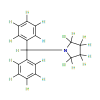

In [135]:
m